<a href="https://colab.research.google.com/github/Bharga-7/stock-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf

ticker_symbol = 'TSLA'

stock_data = yf.download(ticker_symbol, start = '2015-01-01', end = '2025-10-26')

print(stock_data.head())

print(stock_data.tail())

close_prices = stock_data['Close'].values.reshape(-1, 1)

/tmp/ipython-input-828151431.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start = '2015-01-01', end = '2025-10-26')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-10-20  447.429993  449.799988  440.609985  443.869995   63719000
2025-10-21  442.600006  449.299988  442.049988  445.760010   54412200
2025-10-22  438.970001  445.540009  429.000000  443.450012   84023500
2025-10-23  448.980011  449.399994  413.899994  420.000000  

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - loss: 0.0360
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - loss: 6.1343e-04
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - loss: 4.0007e-04
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - loss: 3.8419e-04
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 3.4006e-04
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - loss: 3.5420e-04
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - loss: 3.1678e-04
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 3.1134e-04
Epoch 9/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - loss: 3.3010e-04
Epoch 10/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - loss: 3.0881e-04
Epoch 11/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - loss: 2.5884e-04
Epoch 12/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 2.9427e-04
Epoch 13/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - loss: 2.4267e-04
Epoch 14/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - loss: 2.4066e-04
Epoch 15/30


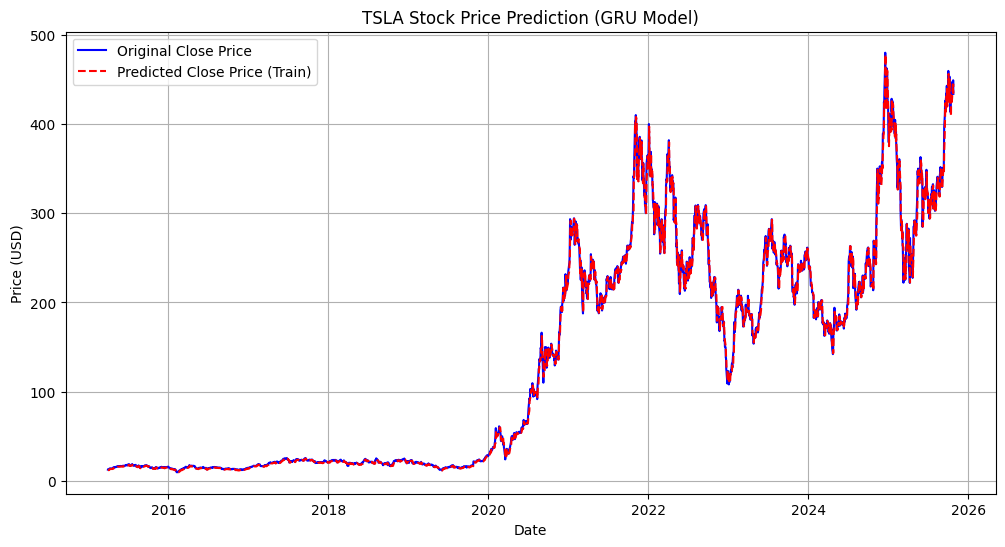

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

time_step = 60

X_train, y_train = [], []
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i - time_step:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


model = Sequential([
    GRU(100, return_sequences=True, input_shape=(time_step, 1)),
    GRU(100),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)


last_60_days = scaled_data[-time_step:]

X_test = np.reshape(last_60_days, (1, time_step, 1))

predicted_scaled = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

print(f"\n Predicted Closing Price for 27 Oct 2025: ${predicted_price:.2f}")


predicted_all_scaled = model.predict(X_train)
predicted_all = scaler.inverse_transform(predicted_all_scaled)

actual = close_prices[time_step:]
dates = stock_data.index[time_step:]

plt.figure(figsize=(12, 6))
plt.plot(dates, actual, label='Original Close Price', color='blue')
plt.plot(dates, predicted_all, label='Predicted Close Price (Train)', color='red', linestyle='--')
plt.title('TSLA Stock Price Prediction (GRU Model)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()